# Exercises

In [ ]:
# install if needed
# !pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.0.7-py3-none-any.whl size=181101 sha256=b19666f2df35141c482273ff2c3a7e8655957608a1d0ab9c8bb5c4cb5fe0652f
  Stored in directory: /root/.cache/pip/wheels/f7/e2/c1/1c7fd8b261e72411f6509afb429c84532e40ddcd96074473f4
Successfully built pyod


## Overview: Manufacturing Machine Anomaly Detection

### Project Detail

>In this project, we use [NAB-dataset](https://drive.google.com/file/d/12fFZ9k8wsmWBVUhcsVxmKsqHxaVzAzqt/view?usp=sharing), which is a novel benchmark for evaluating algorithms for anomaly detection in several fields.  
>There are 58 timeseries data from various kind of sources.
>* **Real data**
>    * realAWSCloudwatch
>    * realAdExchange
>    * realKnownCause
>    * realTraffic
>    * realTweets
>* **Artificial data**
>    * artificialNoAnomaly
>    * artificialWithAnomaly
>
>Among these datasets, you will analyze **'machine_temperature_system_failure'** from realKnownCause dataset which focuses on an actual manufacturing device.

>This dataset does not include which were the actual anomaly rows, so we need to refer to the [NAB github page](https://github.com/numenta/NAB/blob/master/labels/combined_windows.json).




### Load the dataset
>As above, we use 'machine_temperature_system_failure.csv' for our analysis.  
>According to dataset information, it has the following features : 
>* Temperature sensor data of an internal component of a large, industrial machine.

In [ ]:
import pandas as pd

# LOAD DATA
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('drive/MyDrive/04_MachineLearning/machine_temperature_system_failure.csv')
df.head(10)

# df = pd.read_csv("04_MachineLearning/machine_temperature_system_failure.csv")
# print(f'machine_temperature_system_failure.csv : {df.shape}')
# df.head(10)

Mounted at /content/drive


,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836
5,2013-12-02 21:40:00,78.710418
6,2013-12-02 21:45:00,80.269784
7,2013-12-02 21:50:00,80.272828
8,2013-12-02 21:55:00,80.353425
9,2013-12-02 22:00:00,79.486523


### Pre-processing

#### Anomaly Points
>We can get anomaly points information [here](https://github.com/numenta/NAB/blob/master/labels/combined_windows.json)

This is usually rare unless we get feedback from domain experts regarding which days there was an issue \ anomaly in the machine.

But we can use this to generate ground truth labels for each row of data in terms of whether it was truly an anomaly or not! 

In [ ]:
anomaly_points = [
        ["2013-12-10 06:25:00.000000","2013-12-12 05:35:00.000000"],
        ["2013-12-15 17:50:00.000000","2013-12-17 17:00:00.000000"],
        ["2014-01-27 14:20:00.000000","2014-01-29 13:30:00.000000"],
        ["2014-02-07 14:55:00.000000","2014-02-09 14:05:00.000000"]
]

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

#is anomaly? : True => 1, False => 0

# by default nothing is an anomaly
df['anomaly'] = 0

# convert time slices of data as anomalies (in the anomaly column) by setting it to 1
for start, end in anomaly_points:
    df.loc[((df['timestamp'] >= start) & (df['timestamp'] <= end)), 'anomaly'] = 1

In [ ]:
df['anomaly'].value_counts()

0    20427
1     2268
Name: anomaly, dtype: int64

In [ ]:
df['anomaly'].value_counts(normalize=True)

0    0.900066
1    0.099934
Name: anomaly, dtype: float64

Roughly 10% of data has anomalies

## EDA

Let's plot some graphs now!

In [ ]:
# creating a separate DF to use for visuals \ adding time elements
visual_df = df.copy()

### Datetime Information

In [ ]:
visual_df['year'] = df['timestamp'].dt.year
visual_df['month'] = df['timestamp'].dt.month
visual_df['day'] = df['timestamp'].dt.day_name()
visual_df['hour'] = df['timestamp'].dt.hour

In [ ]:
visual_df.head()

,timestamp,value,anomaly,year,month,day,hour
0,2013-12-02 21:15:00,73.967322,0,2013,12,Monday,21
1,2013-12-02 21:20:00,74.935882,0,2013,12,Monday,21
2,2013-12-02 21:25:00,76.124162,0,2013,12,Monday,21
3,2013-12-02 21:30:00,78.140707,0,2013,12,Monday,21
4,2013-12-02 21:35:00,79.329836,0,2013,12,Monday,21


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


### Looking at Anomalies based on Year, Month and Weekday

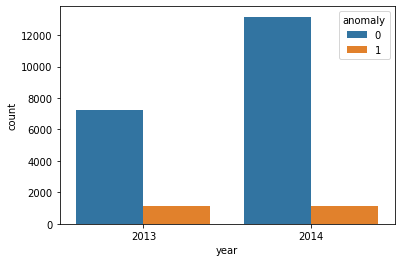

In [ ]:
sns.countplot(x='year', hue='anomaly', data=visual_df);

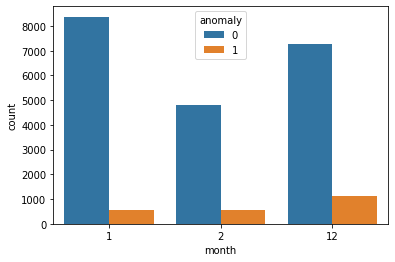

In [ ]:
sns.countplot(x='month', hue='anomaly', data=visual_df);

''

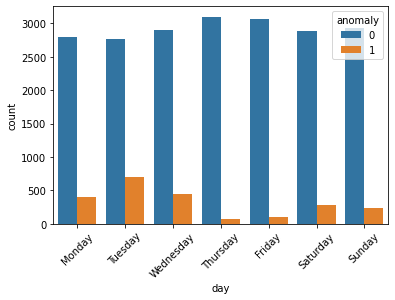

In [ ]:
sns.countplot(x='day', hue='anomaly', data=visual_df)
plt.xticks(rotation=45)
;

### Visualizing Anomaly Distributions

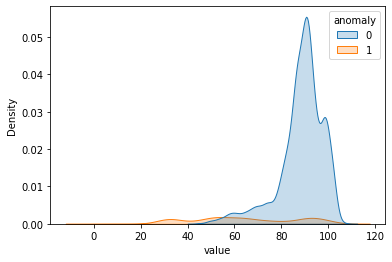

In [ ]:
sns.kdeplot(x='value', hue='anomaly', data=visual_df, shade=True);

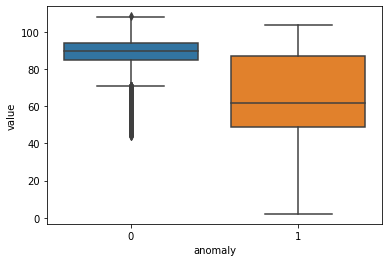

In [ ]:
sns.boxplot(y='value', x='anomaly', data=visual_df);

### Time Series Analysis

>plot temperature & its given anomaly points.

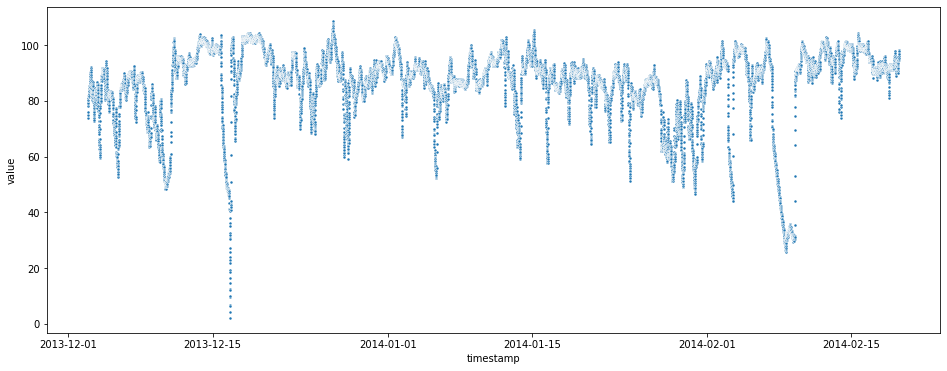

In [ ]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='timestamp', y='value', data=visual_df, marker=".");

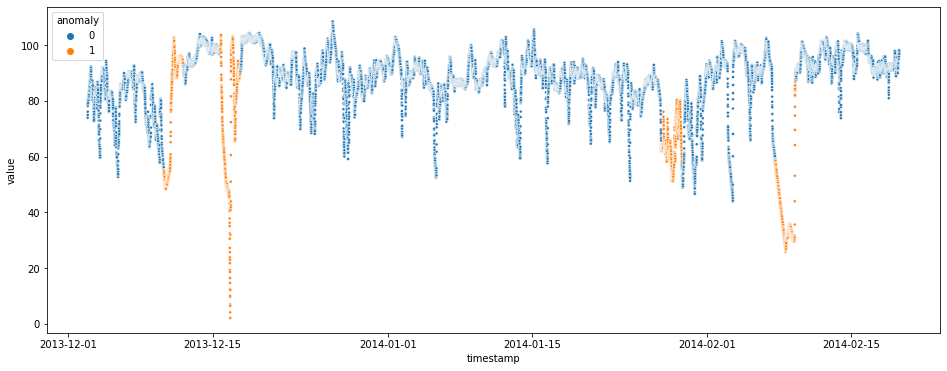

In [ ]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='timestamp', y='value', data=visual_df, hue='anomaly', marker=".");

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

## Modeling
>We will build several anomaly detection models and compare them each other. Let's create our datset `X` and ground truth labels `y`. Remember to use `y` only to evaluate model performance. In reality you are not supposed to know `y` beforehand. So don't use it for modeling

We will train and evaluate the following models

- 3-Sigma
- Boxplot
- Local Outlier Factor (LOF)
- Isolation Forest
- Mean Absolute Deviation (MAD)

### Prepare Dataset

In [ ]:
X = df[['timestamp', 'value']]
y = df['anomaly']

X.head()

,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


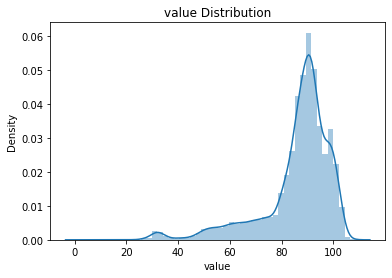

In [ ]:
sns.distplot(X['value'])
plt.title("value Distribution");

### Model: 1. The 3-sigma Model

Compute mean and standard deviation and use the 3-STD (3-sigma) rule to compute the lower and upper limit.

Remember,

LL = mean - 3sigma
UL = mean + 3sigma

Find out if each row of data is an outlier or not based on the temperature (`value`) column from `X` and compute performance using the ground truth labels in `y` using `classification_report`

#### Build Model and Compute Outliers

In [ ]:
mean = X['value'].mean()
sigma = X['value'].std()
sigma3 = 3*sigma

threshold_value = mean + sigma3
threshold_value2 = mean-sigma3
print('Threshold value_upper:', threshold_value)
print('Threshold value_lower:', threshold_value2)

Threshold value_upper: 127.16723562995051
Threshold value_lower: 44.685760791409905


In [ ]:
outliers_df = X['value'][(X['value'] > threshold_value)|(X['value'] < threshold_value2) ]


print('Total Outliers:', len(outliers_df))


outliers_sorted = outliers_df.sort_values(ascending=False)
outliers_sorted.head(5)

Total Outliers: 462


18035    44.672444
18037    44.612622
19346    44.508738
19345    44.451015
19356    44.389128
Name: value, dtype: float64

In [ ]:
y_pred = df['value'] < threshold_value2
y_pred = pd.DataFrame (y_train)
y_pred.head()

,value
0,False
1,False
2,False
3,False
4,False


#### Evaluate Model Performance

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     20427
           1       0.99      0.20      0.34      2268

    accuracy                           0.92     22695
   macro avg       0.95      0.60      0.65     22695
weighted avg       0.93      0.92      0.90     22695



#### Visualize Outliers using TimeSeries

Use a similar scatterplot as before

In [ ]:
df['outlier']=df['value'].apply(lambda x: 1 if x < threshold_value2 else 0 )

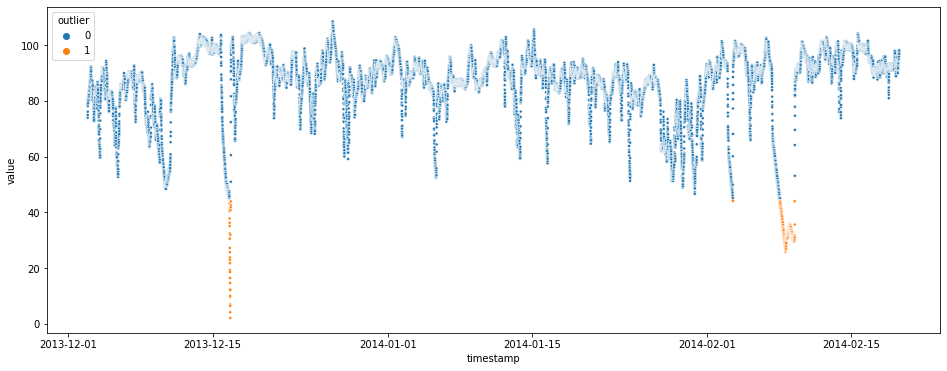

In [ ]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='timestamp', y='value', hue='outlier', data=df,marker=".");

### Model: 2. The Box-Plot Model

Compute Q1 and Q3 and use the IQR rule to compute the lower and upper whiskers.

Remember,

LW = Q1 - 1.5xIQR
UW = Q3 + 1.5xIQR

Find out if each row of data is an outlier or not based on the temperature (`value`) column from `X` and compute performance using the ground truth labels in `y` using `classification_report`

#### Build Model and Compute Outliers

In [ ]:
from scipy import stats
Q1 = X['value'].quantile(0.25)
Q1

83.080077795

In [ ]:
IQR = stats.iqr(X['value'])

Q1 = X['value'].quantile(0.25)
Q3 = X['value'].quantile(0.75)

LW = Q1 - 1.5*IQR 
UW = Q3 + 1.5*IQR

print('Lower quartile:', LW)
print('Upper quartile:', UW)

Lower quartile: 66.67581704999999
Upper quartile: 110.42051237


In [ ]:
outliers_df = X['value'][(X['value'] > UW)|(X['value'] < LW) ]


print('Total Outliers:', len(outliers_df))


outliers_sorted = outliers_df.sort_values(ascending=False)
outliers_sorted.head(5)

Total Outliers: 2298


1754     66.675505
16833    66.670671
14068    66.668372
16832    66.668117
16228    66.658359
Name: value, dtype: float64

#### Evaluate Model Performance

In [ ]:
df['outlier'] = df['value'].apply(lambda x: 1 if x > UW or x < LW else 0 )

In [ ]:
print(classification_report(df['outlier'], y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     20397
           1       1.00      0.20      0.33      2298

    accuracy                           0.92     22695
   macro avg       0.96      0.60      0.65     22695
weighted avg       0.93      0.92      0.89     22695



#### Visualize Outliers using TimeSeries

Use a similar scatterplot as before

<AxesSubplot:xlabel='timestamp', ylabel='value'>

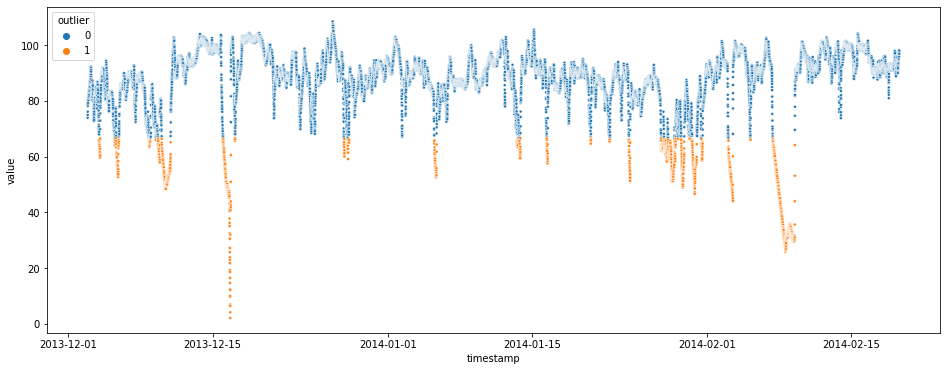

In [ ]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='timestamp', y='value', hue='outlier', data=df,marker=".")

### Model: 3. The Local Outlier Factor Model

You have already used LOF and learnt about it before. Now use it for outlier detection and evaluate its performance and visualize the outliers.

Use a default contamination rate of 0.1 for this model

You can use the `pyod` library for this model

Clustering Based Local Outlier Factor (CBLOF)

#### Build Model and Compute Outliers

In [ ]:
from pyod.models import cblof
from pyod.models import lof

lof_model = lof.LOF(contamination=0.10)

In [ ]:
df1 = df['value']
type(df1)
df1=pd.DataFrame(df1)

In [ ]:
lof_model.fit(df1)

LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)

In [ ]:
outlier_predictions = lof_model.predict(df1)

outliers_df = df1.copy(deep=True)
outliers_df['Outlier'] = outlier_predictions
outliers_df = outliers_df[outliers_df['Outlier'] == 1]

print('Total Outliers:', len(outliers_df))
outliers_sorted = outliers_df.sort_values(by='value', ascending=False)
outliers_sorted.head(5)

Total Outliers: 1768


,value,Outlier
6846,108.510543,1
6845,108.117420,1
6848,107.542563,1
6854,107.391149,1
6851,107.163525,1


#### Evaluate Model Performance

In [ ]:
outlier_predictions = lof_model.predict(df1)

outliers_df = df1.copy(deep=True)
outliers_df['Outlier'] = outlier_predictions
print(classification_report(y, outliers_df['Outlier']))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     20427
           1       0.12      0.09      0.10      2268

    accuracy                           0.84     22695
   macro avg       0.51      0.51      0.51     22695
weighted avg       0.82      0.84      0.83     22695



In [ ]:
outliers_df.head()

,value,Outlier
0,73.967322,0
1,74.935882,0
2,76.124162,0
3,78.140707,0
4,79.329836,0


#### Visualize Outliers using TimeSeries

Use a similar scatterplot as before

In [ ]:
merged_df=df.merge(outliers_df, on='value')

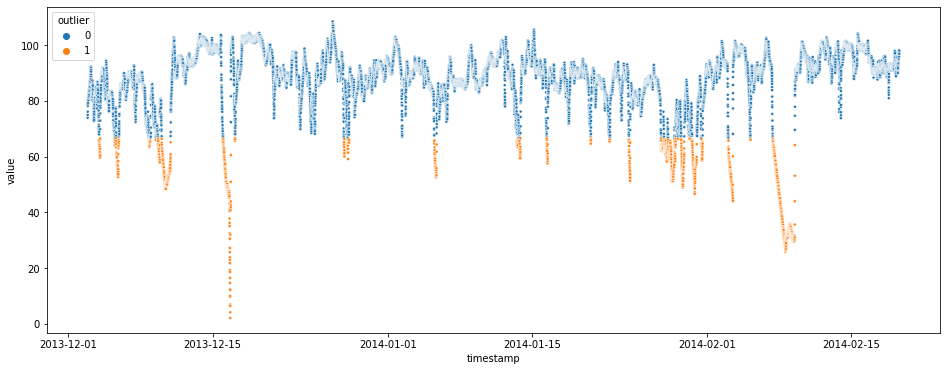

In [ ]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='timestamp', y='value', hue='outlier', data=merged_df, marker=".");

### Model: 4. The Isolation Forest Model

You have already used IForest and learnt about it before. Now use it for outlier detection and evaluate its performance and visualize the outliers.

Use a default contamination rate of 0.1 for this model

You can use the `pyod` library for this model

#### Build Model and Compute Outliers

In [ ]:
df1 = df['value']
type(df1)
df1=pd.DataFrame(df1)

In [ ]:
from pyod.models import iforest

if_model = iforest.IForest(n_estimators=100, contamination=0.10)
if_model.fit(df1)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [ ]:
outlier_predictions = if_model.predict(df1)

outliers_df = df1.copy(deep=True)
outliers_df['Outlier'] = outlier_predictions
outliers_df = outliers_df[outliers_df['Outlier'] == 1]

print('Total Outliers:', len(outliers_df))
outliers_sorted = outliers_df.sort_values(by='value', ascending=False)
outliers_sorted.head(5)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Total Outliers: 2260


,value,Outlier
6846,108.510543,1
6845,108.117420,1
6848,107.542563,1
6854,107.391149,1
6851,107.163525,1


#### Evaluate Model Performance

In [ ]:
outlier_predictions = if_model.predict(df1)

outliers_df = df1.copy(deep=True)
outliers_df['Outlier'] = outlier_predictions
print(classification_report(y, outliers_df['Outlier']))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.95      0.95      0.95     20427
           1       0.51      0.50      0.51      2268

    accuracy                           0.90     22695
   macro avg       0.73      0.73      0.73     22695
weighted avg       0.90      0.90      0.90     22695



#### Visualize Outliers using TimeSeries

Use a similar scatterplot as before

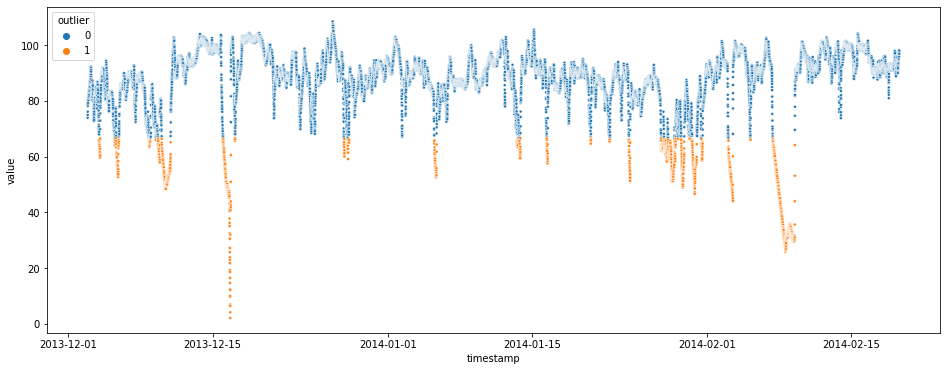

In [ ]:
merged_df=df.merge(outliers_df, on='value')
plt.figure(figsize=(16, 6))
sns.scatterplot(x='timestamp', y='value', hue='outlier', data=merged_df, marker=".");

### Model: 5. The Median Absolute deviation (MAD) Model

Median Absolute deviation (MAD) is usually used for univariate data. It is a statistical model and is a very simple measure of variation in a sample. In that sense, it is quite similar to the standard deviation in terms of measuring statistical dispersion. 

The MAD is defined as being the median of the absolute value of the residuals between each observation and the median:

![](https://i.imgur.com/fBN8QtD.png)

For time-series data such as this we usually compute MAD at every point and then have a series of MAD values as shown in the figure below.

![](https://i.imgur.com/bVefufj.png)


Then we choose a threshold value based on a confidence interval (Z-score) which helps in defining boundaries \ intervals of normal behavior, beyond which any real values are flagged as outliers \ anomalies. An example is shown in the following figure.

![](https://i.imgur.com/5TJxGVw.png)

Luckily PyOD can do everything for us! You just need to specify the z-score `threshold` value in the model


You can use the `pyod` library for this model

You can use the default threshold of 3.5 which assumes around 99.97% of the data within the CI will not be anomalies

In [ ]:
from scipy.stats import norm

norm.cdf(3.5)

0.9997673709209645

#### Build Model and Compute Outliers

In [ ]:
from pyod.models import mad

In [ ]:
mad_model = mad.MAD(threshold=3.5)

In [ ]:
mad_model.fit(df1)
outlier_predictions = mad_model.predict(df1)

outliers_df = df1.copy(deep=True)
outliers_df['Outlier'] = outlier_predictions
outliers_df = outliers_df[outliers_df['Outlier'] == 1]

print('Total Outliers:', len(outliers_df))
outliers_sorted = outliers_df.sort_values(by='value', ascending=False)
outliers_sorted.head(5)

Total Outliers: 1748


,value,Outlier
15147,61.886159,1
19202,61.880166,1
16319,61.851897,1
2087,61.822654,1
9750,61.766169,1


#### Evaluate Model Performance

In [ ]:
outlier_predictions = if_model.predict(df1)

outliers_df = df1.copy(deep=True)
outliers_df['Outlier'] = outlier_predictions
print(classification_report(y, outliers_df['Outlier']))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.95      0.95      0.95     20427
           1       0.51      0.50      0.51      2268

    accuracy                           0.90     22695
   macro avg       0.73      0.73      0.73     22695
weighted avg       0.90      0.90      0.90     22695



#### Visualize Outliers using TimeSeries

Use a similar scatterplot as before

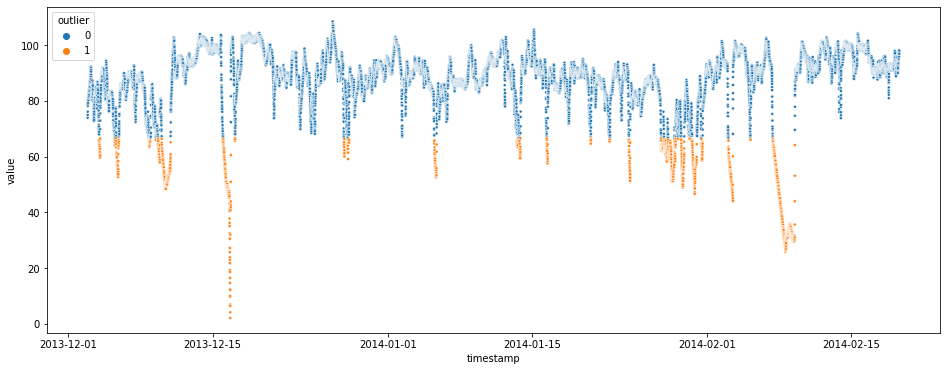

In [ ]:
merged_df=df.merge(outliers_df, on='value')
plt.figure(figsize=(16, 6))
sns.scatterplot(x='timestamp', y='value', hue='outlier', data=merged_df, marker=".");

## Conclusion


Which models worked the best? Answer the same below based on your observation.

Simpler statistical models like boxplot and MAD performed better!

## References
> * **NAB Anomaly Points References**  
> https://github.com/numenta/NAB/blob/master/labels/combined_windows.json  
> * **PyOD documentation**  
> https://pyod.readthedocs.io/en/latest/  